In [1]:
#Importar paquetes
import pandas as pd
import numpy as np
import sqlite3 as sql


In [2]:
import os  ### para ver y cambiar directorio de trabajo

In [4]:
os.getcwd()


'c:\\Users\\Sergio\\Desktop\\analitica\\AnaliticaIII-Marketing'

In [5]:
###### para ejecutar sql y conectarse a bd ###

conn=sql.connect('db_movies')
cur=conn.cursor() ###para funciones que ejecutan sql en base de datos


In [6]:
def ejecutar_sql (nombre_archivo, cur):
    sql_file=open(nombre_archivo)
    sql_as_string=sql_file.read()
    sql_file.close
    cur.executescript(sql_as_string)

In [7]:
#######
############ cargar tablas ####

movies= pd.read_sql('select * from movies', conn)
ratings = pd.read_sql('select * from ratings', conn)

Tabla Movies

In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
#Observar columnas de movies
print('Columnas:',movies.columns)
#Dimensiones de la base
print('Dimensiones:', movies.shape)

Columnas: Index(['movieId', 'title', 'genres'], dtype='object')
Dimensiones: (9742, 3)


In [10]:
#Conocer el tipo de variables
print(movies.dtypes)

movieId     int64
title      object
genres     object
dtype: object


In [11]:
#Información general
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Tabla Ratings

In [12]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [14]:
#Observar columnas de movies
print('Columnas:',ratings.columns)
#Dimensiones de la base
print('Dimensiones:', ratings.shape)

Columnas: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Dimensiones: (100836, 4)


In [15]:
#Conocer el tipo de variables
print(ratings.dtypes)

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [16]:
from datetime import datetime
datetime.fromtimestamp(964982703)

datetime.datetime(2000, 7, 30, 13, 45, 3)

In [17]:
#Modificar formato de timestamp a datetime
from datetime import datetime
ratings['timestamp']= ratings.apply(lambda x: datetime.fromtimestamp(x['timestamp']), axis=1)
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 13:45:03
1,1,3,4.0,2000-07-30 13:20:47
2,1,6,4.0,2000-07-30 13:37:04
3,1,47,5.0,2000-07-30 14:03:35
4,1,50,5.0,2000-07-30 13:48:51


Nueva base de datos

In [18]:
#Crear base de datos con la unión de las tablas de movies y ratings
movie_ratings = pd.merge(ratings,movies, how="left", right_on="movieId", left_on="movieId")
movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 13:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 13:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 13:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 14:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 13:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [19]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
 4   title      100836 non-null  object        
 5   genres     100836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


In [20]:
#Verificar si hay datos duplicados 
movie_ratings.duplicated().sum()

0

In [21]:
#Observar columnas de la nueva base de datos
movie_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [22]:
genres = movies.copy()
genres = genres.drop(columns=['movieId', 'title'])
genres['genres'] = genres['genres'].str.split('|')
genres_dummies = pd.get_dummies(pd.DataFrame(genres['genres'].tolist()).stack()).sum(level=0)
genres = pd.concat([genres, genres_dummies], axis=1).drop(columns=['genres'])
genres

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
movies2 = pd.concat([movies, genres], axis=1)
movies2 = movies2.drop(['genres'], axis=1)
movies2.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
movies3 = pd.melt(movies2, id_vars= ['movieId', 'title'])
print(movies3.columns)


Index(['movieId', 'title', 'variable', 'value'], dtype='object')


In [25]:
movies3.sample(10)

,movieId,title,variable,value
37896,121372,Bill Burr: Let It Go (2010),Animation,0
77087,134528,Aloha (2015),Documentary,0
2441,3254,Wayne's World 2 (1993),(no genres listed),0
127814,1549,Rough Magic (1995),Musical,0
136302,180985,The Greatest Showman (2017),Musical,0
106321,134859,The Wolfpack (2015),Film-Noir,0
29775,653,Dragonheart (1996),Animation,0
23185,5106,Crossroads (2002),Adventure,0
11062,1779,Sphere (1998),Action,0
128609,2606,Idle Hands (1999),Musical,0


In [26]:
movies3.groupby('variable')[['value']].sum().reset_index()

,variable,value
0,(no genres listed),34.0
1,Action,1828.0
2,Adventure,1263.0
3,Animation,611.0
4,Children,664.0
5,Comedy,3756.0
6,Crime,1199.0
7,Documentary,440.0
8,Drama,4361.0
9,Fantasy,779.0


In [27]:
movie_ratings1 = pd.merge(ratings,movies2, how="left", right_on="movieId", left_on="movieId")


Anális Exploratorio

In [34]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.Collecting plotly



In [35]:

import plotly.graph_objs as go #Graficos
import plotly.express as px
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt ### gráficos

In [36]:
# crear dataset
base = movie_ratings.groupby(['title'])[['rating']].count().sort_values('rating', ascending = False).reset_index().head(10)

# crear gráfica
fig = px.bar(base, x = 'title', y='rating',
             title= '<b>Películas más calificadas<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Películas',
    yaxis_title = 'Calificación',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [37]:
# ARREGLAR
# crear dataset
base = movies3.groupby(['variable'])[['value']].sum().sort_values('value', ascending = False).reset_index()

# crear gráfica
fig = px.pie(base, values = 'value', names ='variable',
             title= '<b>Participación por barrio en el valor de los edificios vendidos<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [38]:
final_dataset = movie_ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset = final_dataset.fillna(0)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#saber cuantas calificaciones tiene cada pelicula
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
#saber cuantas veces han calificado cada película
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')


In [56]:
print(no_movies_voted.max())
print(no_movies_voted.min())

2698
20


In [40]:
print(no_user_voted.min())
print(no_user_voted.max())

1
329


<AxesSubplot:title={'center':'Ratings por usuario'}, ylabel='Ratings'>

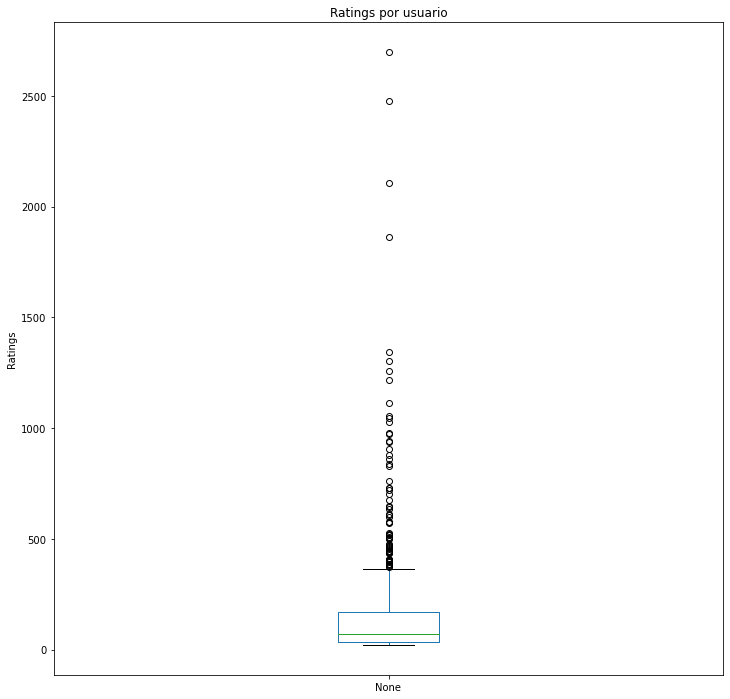

In [41]:
rated_movies_by_user = ratings.groupby("userId").size().sort_values(ascending=False)
rated_movies_by_user.plot.box(figsize=(12,12), ylabel="Ratings", title='Ratings por usuario')

In [42]:
#promedio de calificaciones por usuario
rated_movies_by_user = ratings.groupby("userId").size().count()
rated_movies_by_user

610

In [43]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 100].index]
final_dataset

userId,1,4,6,7,10,15,17,18,19,20,...,599,600,601,602,603,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,2.5,4.5,3.5,4.0,0.0,...,3.0,2.5,4.0,0.0,4.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,...,2.5,4.0,0.0,4.0,0.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,4.5,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
conda install -c conda-forge scikit-surprise

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\Sergio\anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py38haa244fe_1        1016 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    scikit-surprise-1.1.1      |   py38h6f4d8f0_2         597 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.6 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38
  scikit-surprise    conda-forge/win-64::scikit-surprise-1.1.1-py38h6f4d8f0_2

The following packages will be UPDATED:

  conda              pkgs/main::c



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda





Executing transaction: ...working... done


In [46]:
pip install scikit-surprise

In [47]:
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate, GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD
from surprise.model_selection import train_test_split

In [49]:
###### leer datos desde tabla de pandas
reader = Reader(rating_scale=(0, 10))

In [50]:
data   = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

In [51]:
models=[KNNBasic(),KNNWithMeans(),KNNWithZScore(),KNNBaseline()] 
results = {}

for model in models:
 
    CV_scores = cross_validate(model, data, measures=["MAE","RMSE"], cv=5, n_jobs=-1)  
    result = pd.DataFrame.from_dict(CV_scores).mean(axis=0).\
             rename({'test_mae':'MAE', 'test_rmse': 'RMSE'})
    results[str(model).split("algorithms.")[1].split("object ")[0]] = result



In [52]:
performance_df = pd.DataFrame.from_dict(results).T
performance_df.sort_values(by='RMSE')

,MAE,RMSE,fit_time,test_time
knns.KNNBaseline,0.669409,0.875835,0.890786,6.069296
knns.KNNWithMeans,0.685989,0.897609,1.053218,5.970630
knns.KNNWithZScore,0.681667,0.898707,0.796816,5.179785
knns.KNNBasic,0.726460,0.947629,0.683937,4.808795


In [53]:
param_grid = { 'sim_options' : {'name': ['msd','cosine'], \
                                'min_support': [5], \
                                'user_based': [False, True]}
             }

In [54]:
gridsearchKNNWithMeans = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], \
                                      cv=2, n_jobs=2)

In [55]:
gridsearchKNNWithMeans.fit(data)

In [56]:
gridsearchKNNWithMeans.best_params["rmse"]
gridsearchKNNWithMeans.best_score["rmse"]

0.9284408720246208

In [57]:
trainset = data.build_full_trainset()


In [58]:
sim_options       = {'name':'msd','min_support':5,'user_based':True}
model = KNNWithMeans(sim_options=sim_options)
model=model.fit(trainset)


Computing the msd similarity matrix...
Done computing similarity matrix.


In [60]:
predset = trainset.build_anti_testset() 
predictions = model.test(predset) ### función muy pesada
predictions_df = pd.DataFrame(predictions)
predictions.shape

AttributeError: 'list' object has no attribute 'shape'

In [61]:
def recomendaciones(user_id,n_recomend=10):
    
    predictions_userID = predictions_df[predictions_df['uid'] == user_id].\
                    sort_values(by="est", ascending = False).head(n_recomend)

    recomendados = predictions_userID[['iid','est']]
    recomendados.to_sql('reco',conn,if_exists="replace")
    
    recomendados=pd.read_sql('''select a.*, b.book_title 
                             from reco a left join books_final b
                             on a.iid=b.isbn ''', conn)

    return(recomendados)


In [62]:
np.set_printoptions(threshold=sys.maxsize)
predictions_df['uid'].unique()[:20] 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [63]:
us1=recomendaciones(user_id=179733,n_recomend=20)
us1

DatabaseError: Execution failed on sql 'select a.*, b.book_title 
                             from reco a left join books_final b
                             on a.iid=b.isbn ': no such table: books_final